In [1]:
"""
In this section, we import our modules.
"""
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from os.path import join, dirname
from dotenv import load_dotenv
from apiclient.discovery import build
from apiclient.errors import HttpError
import json
import logging
import time
import pprint
import datetime
import csv
import errno
from Queue import Queue
import traceback
import openpyxl

In [5]:
"""
Import the most recent log file and standardize the data into local variables. We also set the values for the regions.  
"""
BASE = "/Users/willsumfest/preto3/"
search_dir_path = BASE + "/output/final"
os.chdir(search_dir_path)
last_search_file = max(os.listdir('.'), key = os.path.getctime)

last_search_file = search_dir_path + "/" + last_search_file + "/words.txt"
with open(last_search_file, "r") as f:
    data = json.loads(f.read())
    
region1 = data[0][0]
region2 = data[1][0]
region3 = data[2][0]

print "San Francisco-Oakland-San Jose CA"
print "Fresno-Visalia CA"
print "California"

# words_for_region1 = data[0][1]
# words_for_region2 = data[1][1]
# words_for_region3 = data[2][1]
words_for_region1 = {u'anticonceptivos': 0.004359773347254733,
 u'best birth control': 0.00916864348628174,
 u'birth control': 0.26909368029754044,
 u'birth control implant': 0.011537188440303794,
 u'birth control pill': 0.03191730743042275,
 u'birth control pills': 0.046245510600955504,
 u'birth control shot': 0.008250973905574102,
 u'birthcontrol': 0.007236752177830338,
 u'birthcontrol implant': 0.0,
 u'birthcontrol pills': 0.0,
 u'birthcontrol shot': 0.0,
 u'contraception': 0.01658243182847525,
 u'contraception definition': 0.0043113564473424215,
 u'contraceptive': 0.016406911107022974,
 u'contraceptive pill': 0.0,
 u'contraceptive pills': 0.0044505812627182615,
 u'copper iud': 0.01191752294815061,
 u'depo shot': 0.014024368518060583,
 u'emergency contraception': 0.005552478823197631,
 u'implant birth control': 0.011537188440303794,
 u'iud': 0.11044281238907713,
 u'iud birth control': 0.01015745334811631,
 u'iud copper': 0.01191752294815061,
 u'iud side effects': 0.0064345772177435345,
 u'male birth control': 0.006628596847989813,
 u'male contraceptive': 0.0032289056616801744,
 u'metodos anticonceptivos': 0.002928183324348805,
 u'metodos anticonceptivos naturales': 0.00012858673143835618,
 u'mirena': 0.04362283086699445,
 u'mirena iud': 0.01588407519136354,
 u'morning after pill': 0.016755569729973673,
 u'nuva ring': 0.006943032312646986,
 u'nuvaring': 0.018133869575811347,
 u'nuvaring reviews': 0.0,
 u'nuvaring side effects': 0.004162950273847136,
 u'ortho tri cyclen': 0.006500879913565218,
 u'plan b pill': 0.019588004869031502,
 u'planned parenthood': 0.2355436029807718,
 u'planned parenthood fresno': 0.005770522363610814,
 u'planned parenthood madera': 0.0,
 u'planned parenthood merced': 0.0,
 u'vasalgel': 0.0026353543924040102,
 u'what is contraception': 0.0}
words_for_region2 = {u'anticonceptivos': 0.01075760957060965,
 u'best birth control': 0.0,
 u'birth control': 0.20628188533569722,
 u'birth control implant': 0.028103937027884066,
 u'birth control pill': 0.03457757084619305,
 u'birth control pills': 0.04291001253711225,
 u'birth control shot': 0.02485607822428003,
 u'birthcontrol': 0.02604939020694694,
 u'birthcontrol implant': 0.0,
 u'birthcontrol pills': 0.0,
 u'birthcontrol shot': 0.0,
 u'contraception': 0.02597804647894957,
 u'contraception definition': 0.0,
 u'contraceptive': 0.029601235269148915,
 u'contraceptive pill': 0.0,
 u'contraceptive pills': 0.0,
 u'copper iud': 0.0,
 u'depo shot': 0.0386841534314564,
 u'emergency contraception': 0.009028741110420683,
 u'implant birth control': 0.0,
 u'iud': 0.06100551092995136,
 u'iud birth control': 0.020294973341952842,
 u'iud copper': 0.0,
 u'iud side effects': 0.0,
 u'male birth control': 0.01948076359851428,
 u'male contraceptive': 0.0,
 u'metodos anticonceptivos': 0.0010282788233540528,
 u'metodos anticonceptivos naturales': 0.0,
 u'mirena': 0.040266258832294184,
 u'mirena iud': 0.0,
 u'morning after pill': 0.03235244441757183,
 u'nuva ring': 0.00773346081462403,
 u'nuvaring': 0.028722608879417875,
 u'nuvaring reviews': 0.0,
 u'nuvaring side effects': 0.0,
 u'ortho tri cyclen': 0.0,
 u'plan b pill': 0.03682810364751908,
 u'planned parenthood': 0.15810519335370063,
 u'planned parenthood fresno': 0.06169677569976475,
 u'planned parenthood madera': 0.02822317659168515,
 u'planned parenthood merced': 0.027433791030951192,
 u'vasalgel': 0.0,
 u'what is contraception': 0.0}
words_for_region3 = {u'anticonceptivos': 0.0023930778319867837,
 u'best birth control': 0.008988103479706366,
 u'birth control': 0.2898149139735634,
 u'birth control implant': 0.01167150503966452,
 u'birth control pill': 0.0331115597182095,
 u'birth control pills': 0.049202607850278184,
 u'birth control shot': 0.009716817563384144,
 u'birthcontrol': 0.006384056512212471,
 u'birthcontrol implant': 0.0,
 u'birthcontrol pills': 0.0,
 u'birthcontrol shot': 0.0,
 u'contraception': 0.015157506738379236,
 u'contraception definition': 0.0016694607247831803,
 u'contraceptive': 0.016046707931998996,
 u'contraceptive pill': 0.0025813415874827625,
 u'contraceptive pills': 0.0020849037843364386,
 u'copper iud': 0.009317160566532413,
 u'depo shot': 0.01671347772268762,
 u'emergency contraception': 0.003789566930118505,
 u'implant birth control': 0.01167150503966452,
 u'iud': 0.09636500442566966,
 u'iud birth control': 0.008779415355234086,
 u'iud copper': 0.009317160566532413,
 u'iud side effects': 0.0051752527180081356,
 u'male birth control': 0.004318555802015497,
 u'male contraceptive': 0.0012246969706651786,
 u'metodos anticonceptivos': 0.0012012148310769398,
 u'metodos anticonceptivos naturales': 0.00036951725252180087,
 u'mirena': 0.03741412741936862,
 u'mirena iud': 0.012885776427945661,
 u'morning after pill': 0.019637023497200427,
 u'nuva ring': 0.004724478884580918,
 u'nuvaring': 0.017688460408782827,
 u'nuvaring reviews': 0.0011427318160340653,
 u'nuvaring side effects': 0.0018632307007717265,
 u'ortho tri cyclen': 0.006615587216618988,
 u'plan b pill': 0.0271429944619969,
 u'planned parenthood': 0.2462000594368256,
 u'planned parenthood fresno': 0.0026970891800064314,
 u'planned parenthood madera': 0.0010437495017404685,
 u'planned parenthood merced': 0.0011093508473811057,
 u'vasalgel': 0.0012918413252373758,
 u'what is contraception': 0.0014784079587961934}

pprint.pprint(words_for_region1)
pprint.pprint(words_for_region2)
pprint.pprint(words_for_region3)
pprint.pprint(words_for_region3.keys())

San Francisco-Oakland-San Jose CA
Fresno-Visalia CA
California
{u'anticonceptivos': 0.004359773347254733,
 u'best birth control': 0.00916864348628174,
 u'birth control': 0.26909368029754044,
 u'birth control implant': 0.011537188440303794,
 u'birth control pill': 0.03191730743042275,
 u'birth control pills': 0.046245510600955504,
 u'birth control shot': 0.008250973905574102,
 u'birthcontrol': 0.007236752177830338,
 u'birthcontrol implant': 0.0,
 u'birthcontrol pills': 0.0,
 u'birthcontrol shot': 0.0,
 u'contraception': 0.01658243182847525,
 u'contraception definition': 0.0043113564473424215,
 u'contraceptive': 0.016406911107022974,
 u'contraceptive pill': 0.0,
 u'contraceptive pills': 0.0044505812627182615,
 u'copper iud': 0.01191752294815061,
 u'depo shot': 0.014024368518060583,
 u'emergency contraception': 0.005552478823197631,
 u'implant birth control': 0.011537188440303794,
 u'iud': 0.11044281238907713,
 u'iud birth control': 0.01015745334811631,
 u'iud copper': 0.01191752294815061

In [12]:
words = ["birth control*", "planned parenthood", "iud", "birth control pill", "emergency contraceptive",
         "nuva ring", "birth control implant", "birth control shot",  "male contraceptive",
         "birth control side effects"]

birthcontrol_subcategory_birth_control_region_1 = words_for_region1["birth control"] + words_for_region1["birthcontrol"] + words_for_region1['best birth control']
birthcontrol_subcategory_contraception_region_1 = words_for_region1["contraception"] + words_for_region1["contraceptive"] + words_for_region1["contraception definition"] + words_for_region1["anticonceptivos"] + words_for_region1["metodos anticonceptivos"] + words_for_region1["metodos anticonceptivos naturales"] + words_for_region1["what is contraception"]
birthcontrol_base_region_1 = birthcontrol_subcategory_birth_control_region_1 + birthcontrol_subcategory_contraception_region_1

birthcontrol_subcategory_birth_control_region_2 = words_for_region2["birth control"] + words_for_region2["birthcontrol"] + words_for_region2['best birth control']
birthcontrol_subcategory_contraception_region_2 = words_for_region2["contraception"] + words_for_region2["contraceptive"] + words_for_region2["contraception definition"] + words_for_region2["anticonceptivos"] + words_for_region2["metodos anticonceptivos"] + words_for_region2["metodos anticonceptivos naturales"] + words_for_region2["what is contraception"]
birthcontrol_base_region_2 = birthcontrol_subcategory_birth_control_region_2 + birthcontrol_subcategory_contraception_region_2


birthcontrol_subcategory_birth_control_region_3 = words_for_region3["birth control"] + words_for_region3["birthcontrol"] + words_for_region3['best birth control']
birthcontrol_subcategory_contraception_region_3 = words_for_region3["contraception"] + words_for_region3["contraceptive"] + words_for_region3["contraception definition"] + words_for_region3["anticonceptivos"] + words_for_region3["metodos anticonceptivos"] + words_for_region3["metodos anticonceptivos naturales"] + words_for_region3["what is contraception"]
birthcontrol_base_region_3 = birthcontrol_subcategory_birth_control_region_3 + birthcontrol_subcategory_contraception_region_3

data_for_region1 = [birthcontrol_base_region_1,
                    words_for_region1["planned parenthood"] + words_for_region1['planned parenthood fresno'] + words_for_region1['planned parenthood madera'] + words_for_region1['planned parenthood merced'],
                    words_for_region1["iud"] + words_for_region1["iud birth control"] + words_for_region1["mirena"] + words_for_region1["mirena iud"],
                    words_for_region1["birth control pill"] + words_for_region1["birth control pills"] + words_for_region1["birthcontrol pills"] + words_for_region1["contraceptive pill"] + words_for_region1["contraceptive pills"] + words_for_region1["ortho tri cyclen"],
                    words_for_region1["plan b pill"] + words_for_region1["emergency contraception"] + words_for_region1["morning after pill"],
                    words_for_region1["nuvaring"] + words_for_region1["nuva ring"] + words_for_region1["nuvaring reviews"],
                    words_for_region1["birth control implant"] + words_for_region1["birthcontrol implant"] + words_for_region1["implant birth control"],
                    words_for_region1["birthcontrol shot"] + words_for_region1["birth control shot"] + words_for_region1["depo shot"],
                    words_for_region1["male contraceptive"] + words_for_region1["male birth control"] + words_for_region1["vasalgel"],
                    words_for_region1["nuvaring side effects"] + words_for_region1["iud side effects"]] 

data_for_region2 = [birthcontrol_base_region_2,
                    words_for_region2["planned parenthood"] + words_for_region2['planned parenthood fresno'] + words_for_region2['planned parenthood madera'] + words_for_region2['planned parenthood merced'],
                    words_for_region2["iud"] + words_for_region2["iud birth control"] + words_for_region2["mirena"] + words_for_region2["mirena iud"],
                    words_for_region2["birth control pill"] + words_for_region2["birth control pills"] + words_for_region2["birthcontrol pills"] + words_for_region2["contraceptive pill"] + words_for_region2["contraceptive pills"] + words_for_region2["ortho tri cyclen"],
                    words_for_region2["plan b pill"] + words_for_region2["emergency contraception"] + words_for_region2["morning after pill"],
                    words_for_region2["nuvaring"] + words_for_region2["nuva ring"] + words_for_region2["nuvaring reviews"],
                    words_for_region2["birth control implant"] + words_for_region2["birthcontrol implant"] + words_for_region2["implant birth control"],
                    words_for_region2["birthcontrol shot"] + words_for_region2["birth control shot"] + words_for_region2["depo shot"],
                    words_for_region2["male contraceptive"] + words_for_region2["male birth control"] + words_for_region2["vasalgel"],
                    words_for_region2["nuvaring side effects"] + words_for_region2["iud side effects"]] 

data_for_region3 = [birthcontrol_base_region_3,
                    words_for_region3["planned parenthood"] + words_for_region3['planned parenthood fresno'] + words_for_region3['planned parenthood madera'] + words_for_region3['planned parenthood merced'],
                    words_for_region3["iud"] + words_for_region3["iud birth control"] + words_for_region3["mirena"] + words_for_region3["mirena iud"],
                    words_for_region3["birth control pill"] + words_for_region3["birth control pills"] + words_for_region1["birthcontrol pills"] + words_for_region1["contraceptive pill"] + words_for_region1["contraceptive pills"] + words_for_region3["ortho tri cyclen"],
                    words_for_region3["plan b pill"] + words_for_region3["emergency contraception"] + words_for_region3["morning after pill"],
                    words_for_region3["nuvaring"] + words_for_region3["nuva ring"] + words_for_region3["nuvaring reviews"],
                    words_for_region3["birth control implant"] + words_for_region3["birthcontrol implant"] + words_for_region3["implant birth control"],                    
                    words_for_region3["birthcontrol shot"] + words_for_region3["birth control shot"] + words_for_region3["depo shot"],
                    words_for_region3["male contraceptive"] + words_for_region3["male birth control"] + words_for_region3["vasalgel"],
                    words_for_region3["nuvaring side effects"] + words_for_region3["iud side effects"]] 

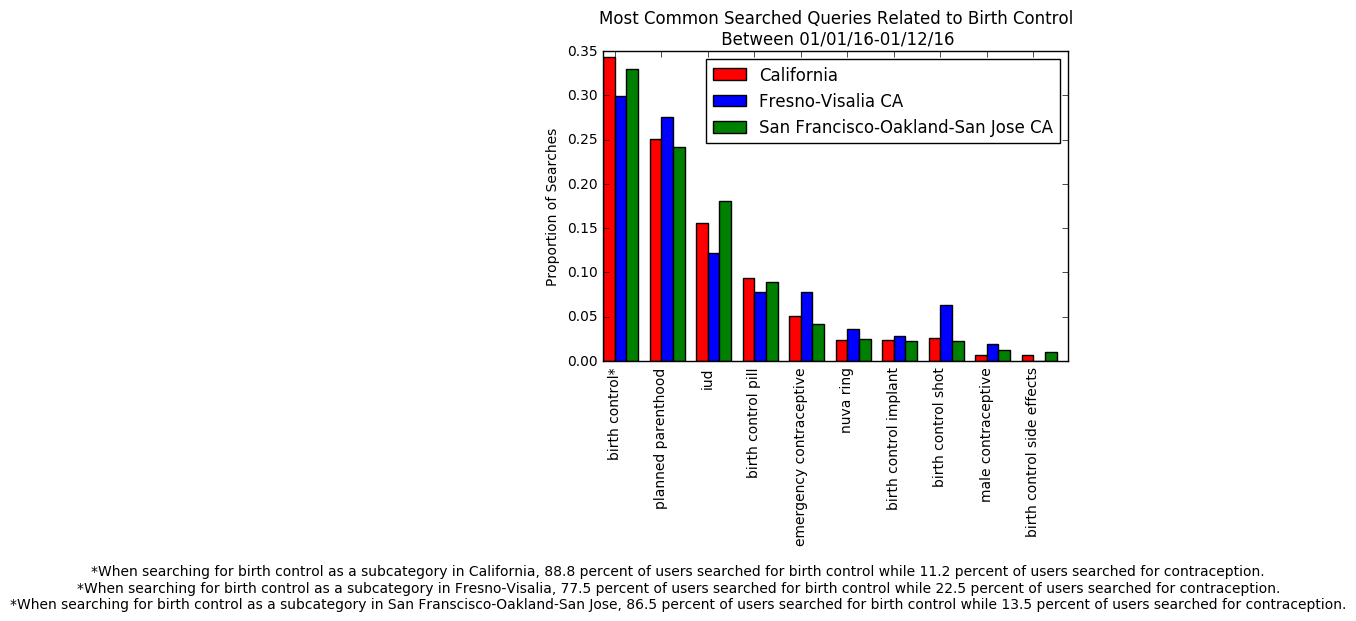

In [15]:

width = 0.25
fig, ax = plt.subplots()
ind = np.arange(len(words))
rects1 = ax.bar(ind, data_for_region3, width, color='r')
rects2 = ax.bar(ind + width, data_for_region2, width, color='b')
rects3 = ax.bar(ind + width*2, data_for_region1, width, color='g')
ax.set_ylabel('Proportion of Searches')
ax.set_title('Most Common Searched Queries Related to Birth Control\n Between 01/01/16-01/12/16')
ax.set_xticks(ind + width)
ax.set_xticklabels(words, rotation='vertical')
ax.legend((rects1[0], rects2[0], rects3[0]), (region3, region2, region1))
plt.figtext(0.25, -0.5, "*When searching for birth control as a subcategory in California, {0} percent of users searched for birth control while {1} percent of users searched for contraception.\n*When searching for birth control as a subcategory in Fresno-Visalia, {2} percent of users searched for birth control while {3} percent of users searched for contraception.\n*When searching for birth control as a subcategory in San Franscisco-Oakland-San Jose, {4} percent of users searched for birth control while {5} percent of users searched for contraception.".format(round(birthcontrol_subcategory_birth_control_region_3/birthcontrol_base_region_3, 3)*100, round(birthcontrol_subcategory_contraception_region_3/birthcontrol_base_region_3, 3)*100, round(birthcontrol_subcategory_birth_control_region_2/birthcontrol_base_region_2, 3)*100, round(birthcontrol_subcategory_contraception_region_2/birthcontrol_base_region_2, 3)*100, round(birthcontrol_subcategory_birth_control_region_1/birthcontrol_base_region_1, 3)*100, round(birthcontrol_subcategory_contraception_region_1/birthcontrol_base_region_1, 3)*100), horizontalalignment='center', verticalalignment='bottom')

plt.show()